In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("D:/CSV/wine.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
#cheaking for missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Analysis and visualization
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


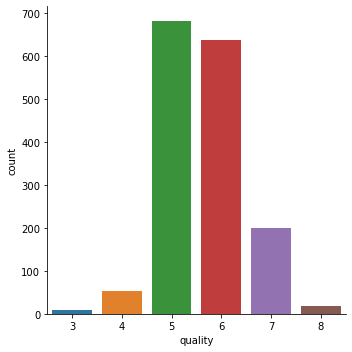

In [8]:
sn.catplot(x='quality',data=df,kind='count')

In [9]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

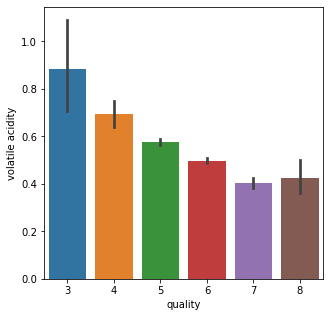

In [10]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sn.barplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

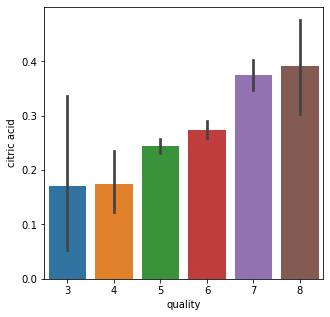

In [11]:
plot=plt.figure(figsize=(5,5))
sn.barplot(x='quality',y='citric acid',data=df)

<AxesSubplot:>

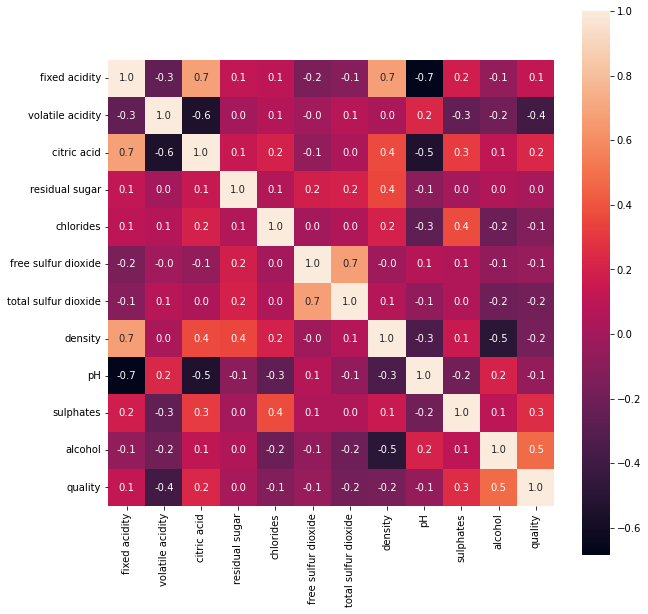

In [13]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),cbar=True,square=True,fmt='.1f',annot=True)

In [14]:
#DATA PREPROCESSING
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
X=df.drop(columns=['quality'],axis=1)
# y=df['quality']

In [23]:
#Lable Binarization
y=df['quality'].apply(lambda y_val:1 if y_val>=7 else 0)

In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
X_train.shape

(1279, 11)

In [30]:
y_train.shape

(1279,)

In [40]:
rf=RandomForestClassifier()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param={
   'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],       
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}

In [43]:
# grid_s=GridSearchCV(estimator=rf,param_grid=param,cv=5)
# grid_s.fit(X_train,y_train)

In [44]:
# print("Best Parameters: ", grid_s.best_params_)
# print("Best Score: ", grid_s.best_score_)

In [73]:
rf1=RandomForestClassifier()

In [74]:
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
predict=rf1.predict(X_test)

In [76]:
accuracy_score(predict,y_test)

0.93125

In [77]:
#if the wine quality is 0 with q i not good else good

In [87]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

In [88]:
inp_data_arr=np.asarray(input_data)

In [89]:
inp_data_arr=inp_data_arr.reshape(1,-1)

In [92]:
predict=rf1.predict(inp_data_arr)
print( "Good Quality" if predict[0]==1 else "Bad Quality")

Good Quality
